In [2]:
import pandas as pd

# Load the dataset
file_path = "advertising (1).csv"
data = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Information:")
print(data.info())  # Check for column types and missing values
print("\nFirst Few Rows:")
print(data.head())  # Display the first few rows


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

First Few Rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


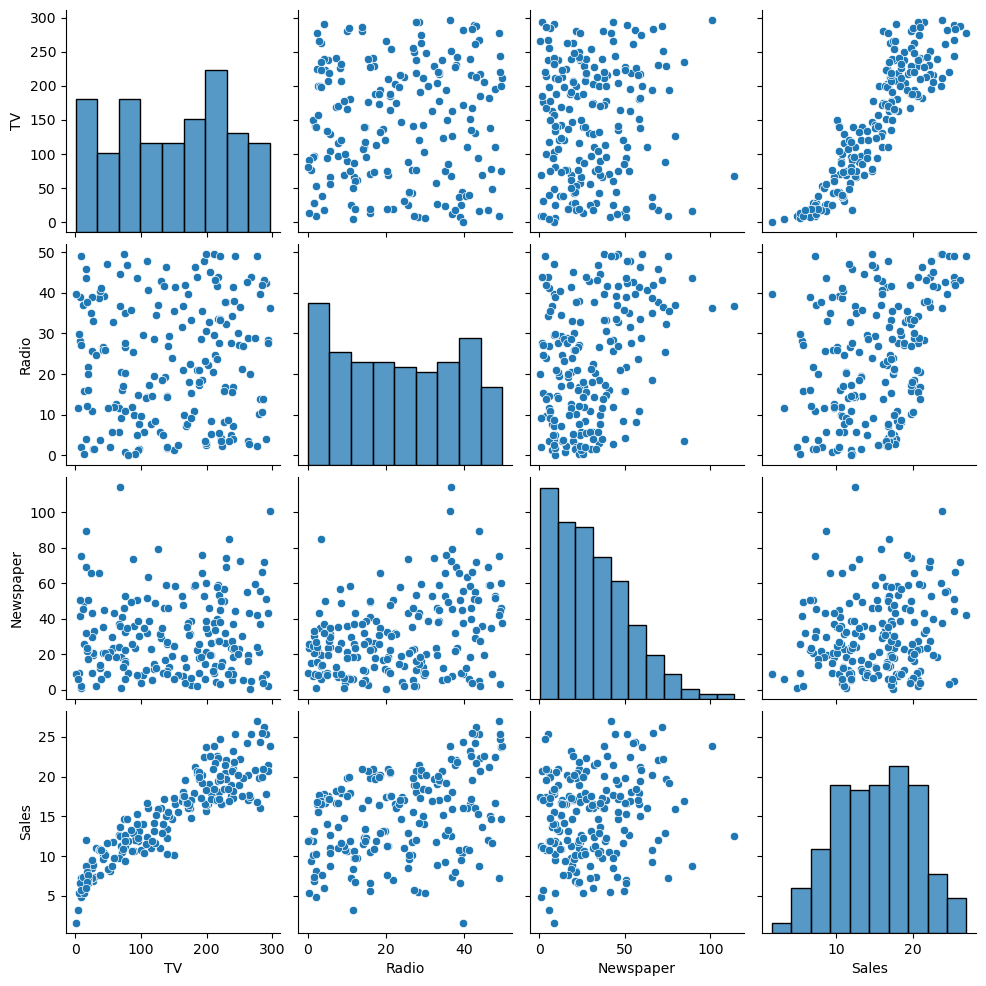

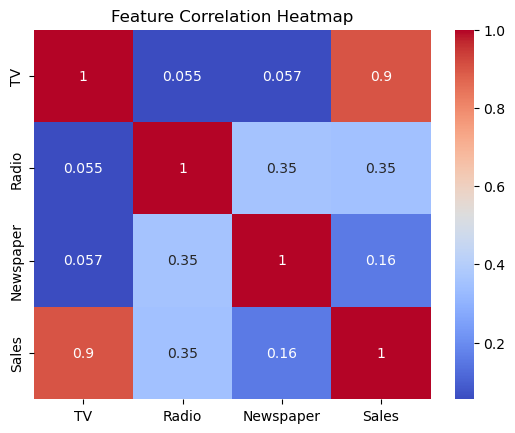

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [4]:
# Check for missing values
print(data.isnull().sum())

# Drop missing rows (if applicable)
data = data.dropna()

# Separate features (X) and target (y)
X = data.drop(columns=["Sales"])  # Features
y = data["Sales"]  # Target


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [5]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 2.907756910271091
R-squared Score: 0.9059011844150826


In [7]:
# Feature importance (coefficients)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)


     Feature  Coefficient
1      Radio     0.100945
0         TV     0.054509
2  Newspaper     0.004337


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared Score: {r2_rf}")


Random Forest - Mean Squared Error: 1.4374328500000009
Random Forest - R-squared Score: 0.9534827934927883


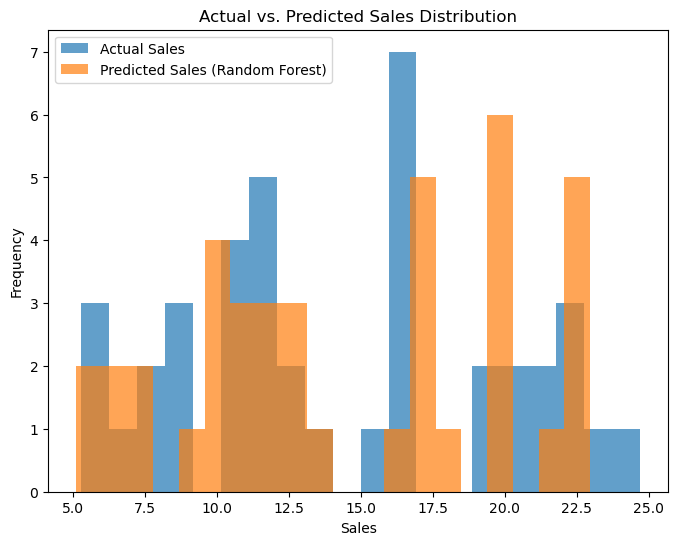

In [11]:
import matplotlib.pyplot as plt

# Plot histogram for actual vs. predicted sales
plt.figure(figsize=(8, 6))

# Plot actual sales
plt.hist(y_test, alpha=0.7, label='Actual Sales', bins=20)

# Plot predicted sales (from Linear Regression or Random Forest)
plt.hist(y_pred_rf, alpha=0.7, label='Predicted Sales (Random Forest)', bins=20)

# Labels and title
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Actual vs. Predicted Sales Distribution")
plt.legend()

plt.show()
